<a href="https://colab.research.google.com/github/danielglz096/data-analytics/blob/main/modelo_prediccion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

José Daniel, Víctor Pérez

# Modelos de prediccion

In [ ]:
!pip install plotly

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import plotly.express as px

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/analitica/reto_final/base_final_final.csv')

In [ ]:
df = df.drop(columns='id')

In [ ]:
display(df.columns)

Index(['hijos', 'edad_ingreso', 'antiguedad', 'edad_salida', 'evaluacion',
       'distancia_km', 'tiempo_h', 'duracion', 'dia_ingreso', 'mes_ingreso',
       'year_ingreso', 'dia_salida', 'mes_salida', 'year_salida',
       'dia_nacimiento', 'mes_nacimiento', 'year_nacimiento', 'Hombre',
       'Mujer', 'baja_liverpool', 'baja_suburbia', 'Eventual No Sind.',
       'Eventual Sind.', 'Planta No Sind.', 'Planta Sind.', 'SBB Eventuales',
       'SBB Planta', 'Vía Planta No Sind.', 'Vía Planta Sind.',
       'ubicacion_encoded', 'funcion_encoded', 'numero_puestos',
       'duracion_promedio'],
      dtype='object')

In [ ]:
correlation_matrix = df.corr()
fig = px.imshow(correlation_matrix, color_continuous_scale='Viridis')
fig.show()

## KN Regressor

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = df.drop("antiguedad", axis=1)
y = df['antiguedad']

#Hacer una pre-separacion de los datos (90-10)
X, X_holdout, y, y_holdout = train_test_split(X, y, test_size=0.10, random_state=42)

#Train test split para el 90% restante
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Regresion KNN
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Entrenar el modelo
knn_regressor.fit(X_train, y_train)

# Predecir con train data
y_train_pred = knn_regressor.predict(X_train)

# Predecir con test data
y_test_pred = knn_regressor.predict(X_test)

# Evaluacion Train
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Evaluacion Test
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Training Metrics:")
print(f"Mean Squared Error: {mse_train}")
print(f"Mean Absolute Error: {mae_train}")
print(f"R-squared (R²): {r2_train}")

print("\nTesting Metrics:")
print(f"Mean Squared Error: {mse_test}")
print(f"Mean Absolute Error: {mae_test}")
print(f"R-squared (R²): {r2_test}")

# Predecir y evaluar 10% restante (holdout)
X_holdout = scaler.transform(X_holdout)
y_holdout_pred = knn_regressor.predict(X_holdout)

mse_holdout = mean_squared_error(y_holdout, y_holdout_pred)
mae_holdout = mean_absolute_error(y_holdout, y_holdout_pred)
r2_holdout = r2_score(y_holdout, y_holdout_pred)

print("\nHoldout Metrics:")
print(f"Mean Squared Error: {mse_holdout}")
print(f"Mean Absolute Error: {mae_holdout}")
print(f"R-squared (R²): {r2_holdout}")


Training Metrics:
Mean Squared Error: 0.6478184529990372
Mean Absolute Error: 0.49787603602242897
R-squared (R²): 0.969127609398462

Testing Metrics:
Mean Squared Error: 0.9643769823289532
Mean Absolute Error: 0.6152393898202688
R-squared (R²): 0.9529802151976915

Holdout Metrics:
Mean Squared Error: 0.9538344433872502
Mean Absolute Error: 0.6110642925105341
R-squared (R²): 0.9456412437907413


### Evaluacion Grafica de resultados

#### Actual vs Predecido

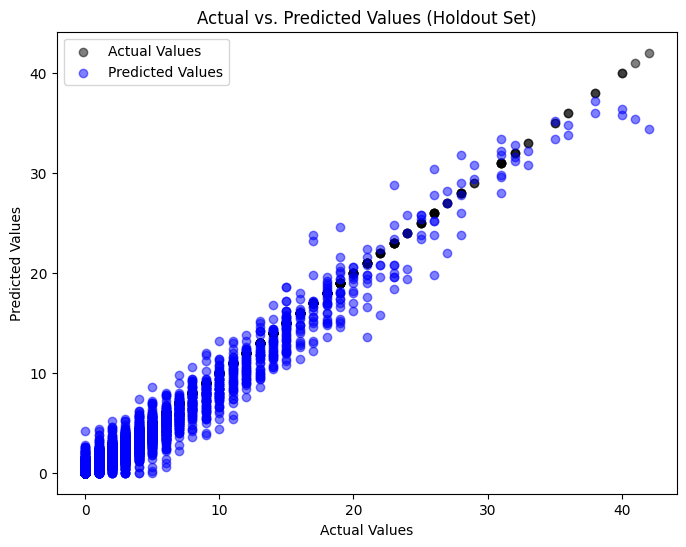

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_holdout, y_holdout, color='black', label='Actual Values', alpha=0.5)
plt.scatter(y_holdout, y_holdout_pred, color='blue', label='Predicted Values', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Holdout Set)')
plt.legend(loc='upper left')
plt.show()


#### Residuales

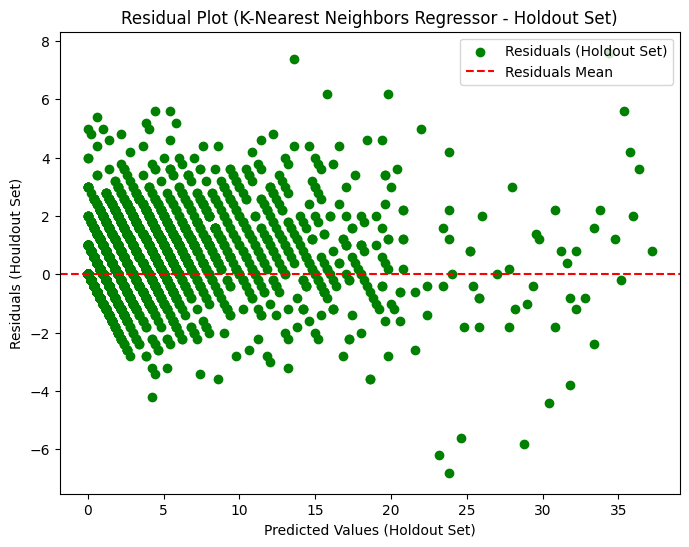

In [ ]:
# Calcular residuales
residuals_test = y_holdout - y_holdout_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_holdout_pred, residuals_test, color='green', label='Residuals (Holdout Set)')
plt.axhline(y=0, color='red', linestyle='--', label='Residuals Mean')
plt.xlabel('Predicted Values (Holdout Set)')
plt.ylabel('Residuals (Houldout Set)')
plt.title('Residual Plot (K-Nearest Neighbors Regressor - Holdout Set)')
plt.legend(loc='upper right')
plt.show()


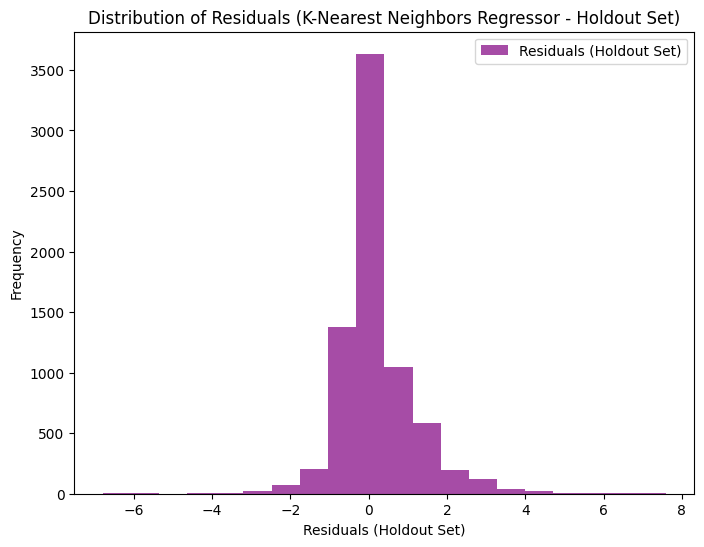

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(residuals_test, bins=20, color='purple', alpha=0.7, label='Residuals (Holdout Set)')
plt.xlabel('Residuals (Holdout Set)')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals (K-Nearest Neighbors Regressor - Holdout Set)')
plt.legend(loc='upper right')
plt.show()


## Random Forest


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Definir variables
features = ['hijos', 'edad_ingreso', 'edad_salida', 'evaluacion', 'distancia_km', 'tiempo_h',
            'dia_ingreso', 'mes_ingreso', 'year_ingreso', 'dia_salida', 'mes_salida', 'year_salida',
            'dia_nacimiento', 'mes_nacimiento', 'year_nacimiento', 'Hombre', 'Mujer', 'baja_liverpool',
            'baja_suburbia', 'Eventual No Sind.', 'Eventual Sind.', 'Planta No Sind.', 'Planta Sind.',
            'SBB Eventuales', 'SBB Planta', 'Vía Planta No Sind.', 'Vía Planta Sind.',
            'ubicacion_encoded', 'funcion_encoded', 'numero_puestos', 'duracion_promedio']

target = 'antiguedad'

# Hacer una pre-separacion de los datos (90-10)
X, X_holdout, y, y_holdout = train_test_split(df[features], df[target], test_size=0.10, random_state=42)

#Train test split para el 90% restante
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regresion Random Forest
rf_regressor = RandomForestRegressor(n_estimators=200, random_state=42)  # You can adjust n_estimators as needed

# Entrenar el modelo
rf_regressor.fit(X_train, y_train)

# Predecir con train data
y_train_pred = rf_regressor.predict(X_train)

# Predecir con test data
y_test_pred = rf_regressor.predict(X_test)

# Evaluacion Train
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Evaluacion test
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Training Metrics:")
print(f"Mean Squared Error: {mse_train}")
print(f"Mean Absolute Error: {mae_train}")
print(f"R-squared (R²): {r2_train}")

print("\nTesting Metrics:")
print(f"Mean Squared Error: {mse_test}")
print(f"Mean Absolute Error: {mae_test}")
print(f"R-squared (R²): {r2_test}")

# Predecir y evaluar 10% restante (holdout)
y_holdout_pred = rf_regressor.predict(X_holdout)

mse_holdout = mean_squared_error(y_holdout, y_holdout_pred)
mae_holdout = mean_absolute_error(y_holdout, y_holdout_pred)
r2_holdout = r2_score(y_holdout, y_holdout_pred)

print("\nHoldout Metrics:")
print(f"Mean Squared Error: {mse_holdout}")
print(f"Mean Absolute Error: {mae_holdout}")
print(f"R-squared (R²): {r2_holdout}")


Training Metrics:
Mean Squared Error: 0.002399317971567202
Mean Absolute Error: 0.014030906035833627
R-squared (R²): 0.9998856582716151

Testing Metrics:
Mean Squared Error: 0.016326278130191815
Mean Absolute Error: 0.036931354780244674
R-squared (R²): 0.9992039854762498

Holdout Metrics:
Mean Squared Error: 0.01577270626614109
Mean Absolute Error: 0.036082642381405454
R-squared (R²): 0.9991011179134645


### Evaluacion Grafica de Resultados

#### Actual vs Predecido

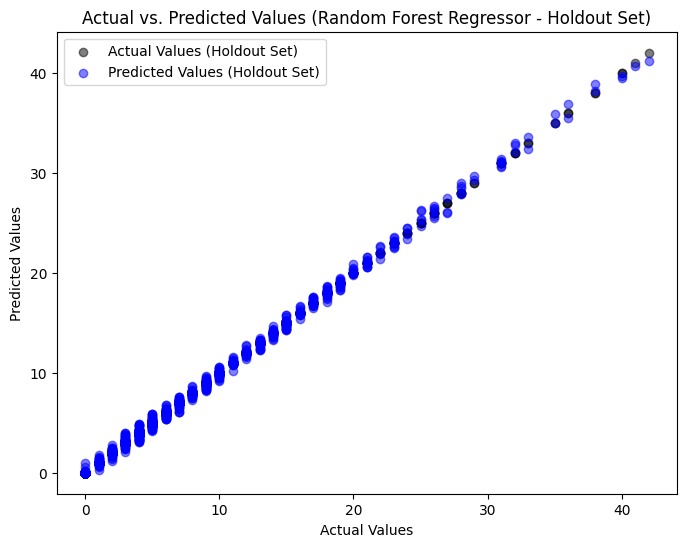

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_holdout, y_holdout, color='black', label='Actual Values (Holdout Set)', alpha=0.5)
plt.scatter(y_holdout, y_holdout_pred, color='blue', label='Predicted Values (Holdout Set)', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Random Forest Regressor - Holdout Set)')
plt.legend(loc='upper left')
plt.show()


#### Residuales

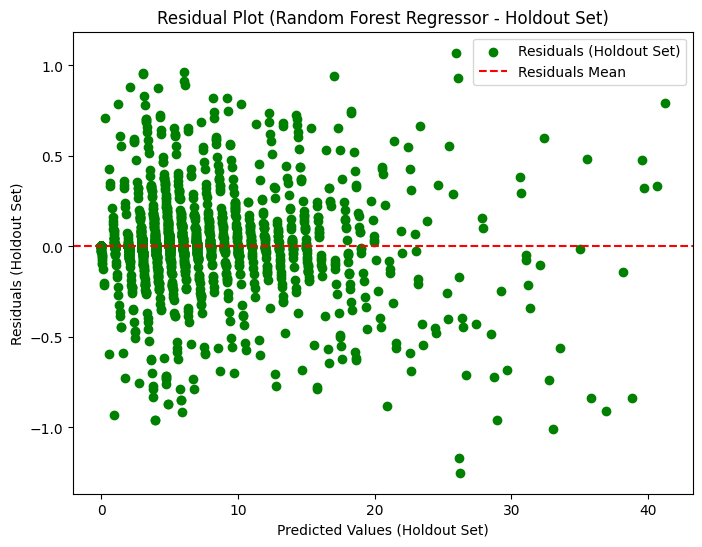

In [ ]:
# Calcular residuales
residuals_rf_test = y_holdout - y_holdout_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_holdout_pred, residuals_rf_test, color='green', label='Residuals (Holdout Set)')
plt.axhline(y=0, color='red', linestyle='--', label='Residuals Mean')
plt.xlabel('Predicted Values (Holdout Set)')
plt.ylabel('Residuals (Holdout Set)')
plt.title('Residual Plot (Random Forest Regressor - Holdout Set)')
plt.legend(loc='upper right')
plt.show()


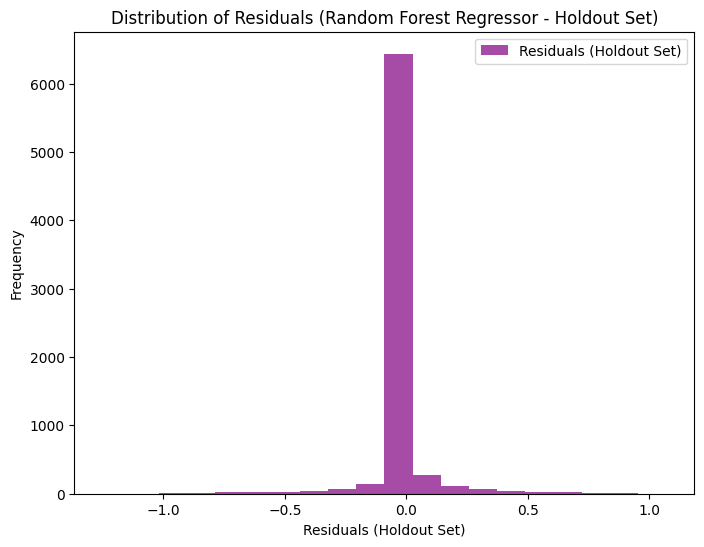

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(residuals_rf_test, bins=20, color='purple', alpha=0.7, label='Residuals (Holdout Set)')
plt.xlabel('Residuals (Holdout Set)')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals (Random Forest Regressor - Holdout Set)')
plt.legend(loc='upper right')
plt.show()
